In [1]:
#import library

import os
import zipfile
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img

In [ ]:
# dataset

test_local_zip = './animals.zip'
zip_ref = zipfile.ZipFile(test_local_zip, 'r')
zip_ref.extractall('/tmp/train')

val_local_zip = './animals.zip'
zip_ref = zipfile.ZipFile(val_local_zip, 'r')
zip_ref.extractall('/tmp/val')

zip_ref.close()

In [ ]:
# Define the training and validation base directories
train_dir = 'C:/Users/ASUS/KULIAHH/BANGKIT 2023/CAPSTONE/animals/tmp/train'
validation_dir = 'C:/Users/ASUS/KULIAHH/BANGKIT 2023/CAPSTONE/animals/tmp/val'

# Directory with training wild pictures
train_wild_dir = os.path.join(train_dir, 'wild')
# Directory with training cat pictures
train_cat_dir = os.path.join(train_dir, 'cat')
# Directory with training dog pictures
train_dog_dir = os.path.join(train_dir, 'dog')
# Directory with validation wild pictures
validation_wild_dir = os.path.join(validation_dir, 'wild')
# Directory with validation cat pictures
validation_cat_dir = os.path.join(validation_dir, 'cat')
# Directory with validation dog pictures
validation_dog_dir = os.path.join(validation_dir, 'dog')

# Check the number of images for each class and set
print(f"There are {len(os.listdir(train_wild_dir))} images of wild for training.\n")
print(f"There are {len(os.listdir(train_dog_dir))} images of dogs for training.\n")
print(f"There are {len(os.listdir(train_cat_dir))} images of cats for training.\n")
print(f"There are {len(os.listdir(validation_wild_dir))} images of wild for validation.\n")
print(f"There are {len(os.listdir(validation_cat_dir))} images of wild for validation.\n")
print(f"There are {len(os.listdir(validation_dog_dir))} images of dog for validation.\n")


There are 4738 images of wild for training.

There are 4739 images of dogs for training.

There are 5153 images of cats for training.

There are 500 images of wild for validation.

There are 500 images of wild for validation.

There are 500 images of dog for validation.



Sample wild image:


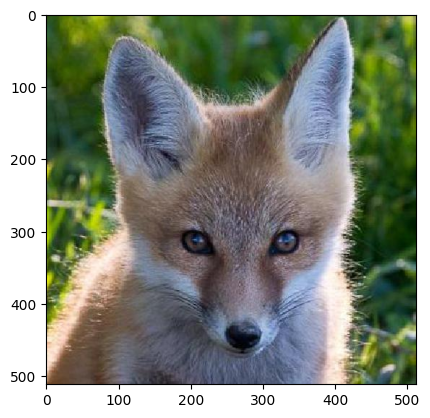


Sample dog image:


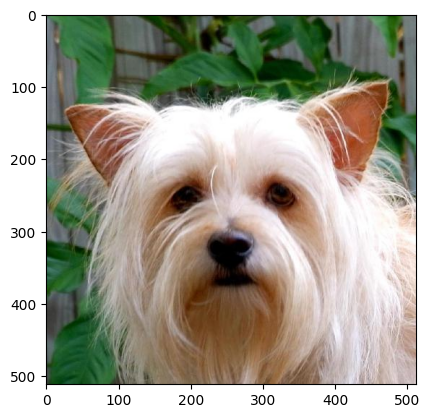


Sample cat image:


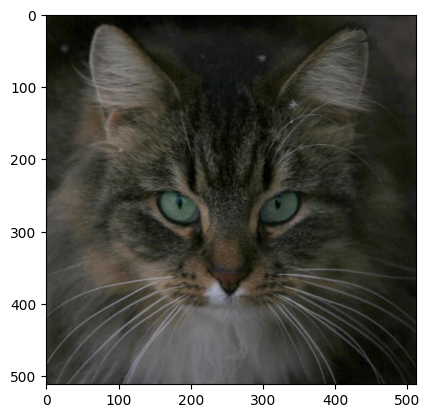

In [ ]:
# print sample image

print("Sample wild image:")
plt.imshow(load_img(f"{os.path.join(train_wild_dir, os.listdir(train_wild_dir)[5])}"))
plt.show()

print("\nSample dog image:")
plt.imshow(load_img(f"{os.path.join(train_dog_dir, os.listdir(train_dog_dir)[5])}"))
plt.show()

print("\nSample cat image:")
plt.imshow(load_img(f"{os.path.join(train_cat_dir, os.listdir(train_cat_dir)[5])}"))
plt.show()

In [ ]:
# Load the first example of a wild
sample_image  = load_img(f"{os.path.join(train_wild_dir, os.listdir(train_wild_dir)[0])}")

# Convert the image into its numpy array representation
sample_array = img_to_array(sample_image)

print(f"Each image has shape: {sample_array.shape}")

# Load the second example of a dog
sample_image  = load_img(f"{os.path.join(train_dog_dir, os.listdir(train_dog_dir)[0])}")

# Convert the image into its numpy array representation
sample_array = img_to_array(sample_image)

print(f"Each image has shape: {sample_array.shape}")

# Load the thrid example of a wild
sample_image  = load_img(f"{os.path.join(train_cat_dir, os.listdir(train_cat_dir)[0])}")

# Convert the image into its numpy array representation
sample_array = img_to_array(sample_image)

print(f"Each image has shape: {sample_array.shape}")

Each image has shape: (512, 512, 3)
Each image has shape: (512, 512, 3)
Each image has shape: (512, 512, 3)


In [ ]:
# GRADED FUNCTION: train_val_generators
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):

  # Instantiate the ImageDataGenerator class on training
  # set normalize pixel values and set arguments to augment the images 
  train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 20,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=32, 
                                                      class_mode='categorical',
                                                      target_size=(224, 224))

  # Instantiate the ImageDataGenerator class on validation
  # validation data should not be augmented
  validation_datagen = ImageDataGenerator(rescale = 1./255.)

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=32, 
                                                                class_mode='categorical',
                                                                target_size=(224, 224))
  return train_generator, validation_generator

In [ ]:
# Test your generators
train_generator, validation_generator = train_val_generators(train_dir, validation_dir)

Found 14630 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.


In [ ]:
import urllib.request

url = 'https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
filename = 'C:/Users/ASUS/KULIAHH/BANGKIT 2023/CAPSTONE/animals/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

urllib.request.urlretrieve(url, filename)



('C:/Users/ASUS/KULIAHH/BANGKIT 2023/CAPSTONE/animals/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5',
 <http.client.HTTPMessage at 0x1b47a854810>)

In [ ]:
# Load inceptionV3

# Import the inception model  
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create an instance of the inception model from the local pre-trained weights
local_weights_file = 'C:/Users/ASUS/KULIAHH/BANGKIT 2023/CAPSTONE/animals/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'


In [ ]:
# GRADED FUNCTION: create_pre_trained_model
def create_pre_trained_model(local_weights_file):
  """
  Initializes an InceptionV3 model.
  
  Args:
    local_weights_file (string): path pointing to a pretrained weights H5 file
    
  Returns:
    pre_trained_model: the initialized InceptionV3 model
  """

  pre_trained_model = InceptionV3(input_shape = (224, 224, 3),
                                  include_top = False, 
                                  weights = None) 

  pre_trained_model.load_weights(local_weights_file)

  # Make all the layers in the pre-trained model non-trainable
  for layer in pre_trained_model.layers:
    layer.trainable = False

  return pre_trained_model

In [ ]:
# check model

pre_trained_model = create_pre_trained_model(local_weights_file)

# Print the model summary
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [ ]:
# check all layers model

total_params = pre_trained_model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in pre_trained_model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 21,802,784 total parameters in this model.
There are 0 trainable parameters in this model.


In [ ]:
# Define a Callback class that stops training once accuracy reaches 99.9%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.999):
      print("\nReached 99.99% accuracy so cancelling training!")
      self.model.stop_training = True

In [ ]:
# GRADED FUNCTION: output_of_last_layer
def output_of_last_layer(pre_trained_model):
  """
  Gets the last layer output of a model
  
  Args:
    pre_trained_model (tf.keras Model): model to get the last layer output from
    
  Returns:
    last_output: output of the model's last layer 
  """

  last_desired_layer = pre_trained_model.get_layer('mixed7')
  print('last layer output shape: ', last_desired_layer.output_shape)
  last_output = last_desired_layer.output
  print('last layer output: ', last_output)

  return last_output

In [ ]:
# check all layers

last_output = output_of_last_layer(pre_trained_model)

last layer output shape:  (None, 12, 12, 768)
last layer output:  KerasTensor(type_spec=TensorSpec(shape=(None, 12, 12, 768), dtype=tf.float32, name=None), name='mixed7/concat:0', description="created by layer 'mixed7'")


In [ ]:
# Print the type of the pre-trained model
print(f"The pretrained model has type: {type(pre_trained_model)}")

The pretrained model has type: <class 'keras.engine.functional.Functional'>


In [ ]:
# GRADED FUNCTION: create_final_model
def create_final_model(pre_trained_model, last_output):
  """
  Appends a custom model to a pre-trained model
  
  Args:
    pre_trained_model (tf.keras Model): model that will accept the train/test inputs
    last_output (tensor): last layer output of the pre-trained model
    
  Returns:
    model: the combined model
  """
  # Flatten the output layer to 1 dimension
  x = layers.Flatten()(last_output)

  # Add a fully connected layer with 256 hidden units and ReLU activation
  x = layers.Dense(1024, activation='relu')(x)
  # Add a dropout rate of 0.2
  x = layers.Dropout(0.2)(x)   
  # Add a final softmax layer for classification
  x = layers.Dense  (3, activation='softmax')(x)          

  # Create the complete model by using the Model class
  model = Model(inputs=pre_trained_model.input, outputs=x)

  # Compile the model
  model.compile(optimizer = RMSprop(learning_rate=0.0001), 
                loss = 'categorical_crossentropy',
                metrics = ['accuracy',])
  
  return model

In [ ]:
# Save your model in a variable
model = create_final_model(pre_trained_model, last_output)

# Inspect parameters
total_params = model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 122,225,571 total parameters in this model.
There are 113,250,307 trainable parameters in this model.


In [ ]:
train_steps = len(train_generator) // 32
validation_steps = len(validation_generator) // 32

history = model.fit(train_generator,
                    validation_data = validation_generator,
                    steps_per_epoch=train_steps,
                    epochs = 30,
                    verbose = 2,
                    validation_steps=validation_steps,
                    callbacks=callbacks)


Epoch 1/30
14/14 - 45s - loss: 0.0264 - accuracy: 0.9933 - val_loss: 0.0031 - val_accuracy: 1.0000 - 45s/epoch - 3s/step
Epoch 2/30
14/14 - 42s - loss: 0.0988 - accuracy: 0.9688 - val_loss: 0.0516 - val_accuracy: 0.9688 - 42s/epoch - 3s/step
Epoch 3/30
14/14 - 42s - loss: 0.0295 - accuracy: 0.9911 - val_loss: 0.0395 - val_accuracy: 1.0000 - 42s/epoch - 3s/step
Epoch 4/30
14/14 - 43s - loss: 0.0479 - accuracy: 0.9844 - val_loss: 0.0071 - val_accuracy: 1.0000 - 43s/epoch - 3s/step


#train model

train_steps = len(train_generator) // 32
validation_steps = len(validation_generator) // 32

history = model.fit(train_generator,
                    validation_data = validation_generator,
                    steps_per_epoch=train_steps,
                    epochs = 30,
                    verbose = 2,
                    validation_steps=validation_steps,
                    callbacks=callbacks)



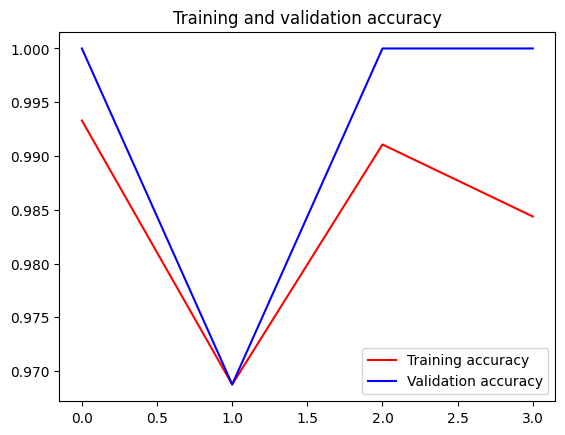

<Figure size 640x480 with 0 Axes>

In [ ]:
# Visualisasi performa model
# Plot the training and validation accuracies for each epoch

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Define the image size and batch size
image_size = (224, 224)
batch_size = 32

# Define the path to the validation directory
val_dir = 'C:/Users/ASUS/KULIAHH/BANGKIT 2023/CAPSTONE/animals/tmp/val'
test_dir = 'C:/Users/ASUS/KULIAHH/BANGKIT 2023/CAPSTONE/animals/tmp/train'

# Create an image dataset from the validation directory
val_data = image_dataset_from_directory(
    directory=val_dir,
    labels='inferred',
    batch_size=batch_size,
    image_size=image_size
)

# Create an image dataset from the test directory
test_data = image_dataset_from_directory(
    directory=test_dir,
    labels='inferred',
    batch_size=batch_size,
    image_size=image_size
)

Found 1500 files belonging to 3 classes.
Found 14630 files belonging to 3 classes.


In [ ]:
#test model
test_loss, test_acc = model.evaluate(train_generator)
print('Test accuracy:', test_acc)


458/458 [==============================] - 951s 2s/step - loss: 0.0243 - accuracy: 0.9917
Test accuracy: 0.9916609525680542
